<a href="https://www.kaggle.com/code/luisfernandobuchelly/ejemplo-titanic?scriptVersionId=271394745" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
path_1 = "/kaggle/input/titanic/train.csv"
path_2 = "/kaggle/input/titanic/test.csv"

train = pd.read_csv(path_1)
test = pd.read_csv(path_2)

In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
ytrain = train['Survived']
train = train.drop(['Name','Ticket','PassengerId','Cabin','Survived'], axis=1)

In [8]:
train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [9]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

In [10]:
encoder_ = OrdinalEncoder()
lista = ["Sex", "Embarked"]
train[lista]= encoder_.fit_transform(train[lista])
imputer_ = SimpleImputer(strategy='median')
train[['Age','Embarked']] = imputer_.fit_transform(train[['Age','Embarked']])

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    float64
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 48.9 KB


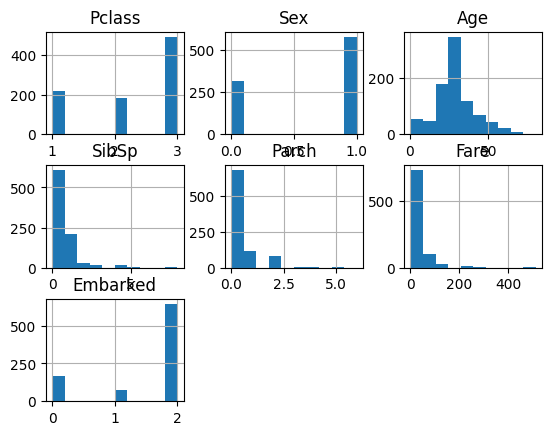

In [12]:
import matplotlib.pyplot as plt
train.hist()
plt.show()

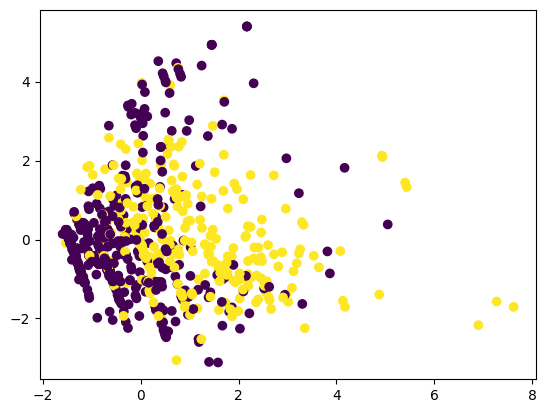

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sca_ = StandardScaler()
red_ = PCA(n_components = 2)
ztrain = red_.fit_transform(sca_.fit_transform(train))
ztrain.shape
plt.scatter(ztrain[:,0],ztrain[:,1],c=ytrain)

In [14]:
import cudf, cupy as cp
from cuml.manifold import UMAP
import matplotlib.pyplot as plt

print("cudf:", cudf.__version__)

cudf: 25.02.02


In [15]:
train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,22.0,1,0,7.2500,2.0
1,1,0.0,38.0,1,0,71.2833,0.0
2,3,0.0,26.0,0,0,7.9250,2.0
3,1,0.0,35.0,1,0,53.1000,2.0
4,3,1.0,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...
886,2,1.0,27.0,0,0,13.0000,2.0
887,1,0.0,19.0,0,0,30.0000,2.0
888,3,0.0,28.0,1,2,23.4500,2.0
889,1,1.0,26.0,0,0,30.0000,0.0


In [16]:
from cuml.manifold import UMAP
import time

umap = UMAP(
    n_neighbors=500,     # más pequeño => preserva estructura local
    min_dist=0.2,       # menor => clusters más compactos
    n_components=2,     # proyección 2D
#    metric="euclidean", # métrica por defecto
#    init="spectral",    # inicialización estable
#    random_state=42
)
sca_ = StandardScaler()
z = umap.fit_transform(sca_.fit_transform(train))
z = np.asarray(z)
z

[2025-10-27 23:04:33.494] [CUML] [info] Building knn graph using brute force


array([[ 1.7276974 , -0.89224243],
       [ 4.548399  ,  4.534174  ],
       [ 1.3218479 ,  5.014517  ],
       ...,
       [ 1.9421759 ,  2.984499  ],
       [ 5.5976486 ,  4.9884853 ],
       [ 7.071768  ,  5.04965   ]], dtype=float32)

In [17]:
ytrain1 = np.asarray(ytrain)
ytrain1

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

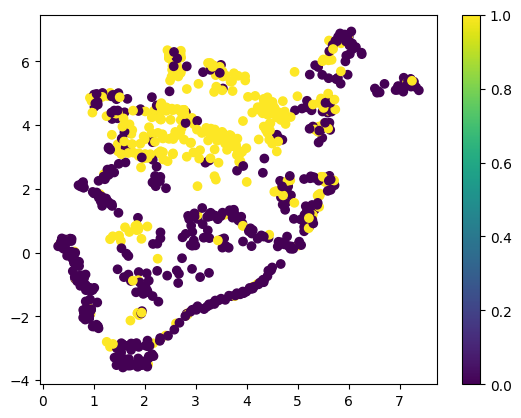

In [18]:
plt.scatter(z[:,0],z[:,1],c=ytrain1)
plt.colorbar()
plt.show()

Shape X (UMAP): (891, 2)
Shape y: (891,)

Entrenando y evaluando modelo: SVM_RBF

Entrenando y evaluando modelo: KNN_5

Entrenando y evaluando modelo: RandomForest

=== Resultados de Validación Cruzada (UMAP 2D) ===


,Modelo,Accuracy_mean,Accuracy_std,Precision_mean,Recall_mean,F1_mean,ROC_AUC_mean
0,KNN_5,0.809,0.017,0.770,0.725,0.745,0.854
1,RandomForest,0.808,0.026,0.779,0.699,0.736,0.860
2,SVM_RBF,0.795,0.023,0.770,0.663,0.712,0.825



Mejor modelo según F1: KNN_5


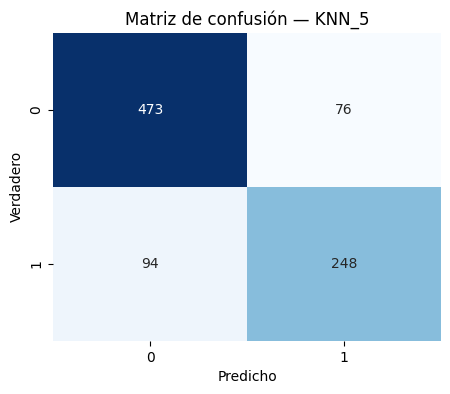


Reporte de Clasificación (CV):
              precision    recall  f1-score   support

           0      0.834     0.862     0.848       549
           1      0.765     0.725     0.745       342

    accuracy                          0.809       891
   macro avg      0.800     0.793     0.796       891
weighted avg      0.808     0.809     0.808       891



In [19]:
# ==============================================================
# PARTE 1: CLASIFICACIÓN Y VALIDACIÓN CRUZADA SOBRE PROYECCIÓN UMAP
# ==============================================================
# Basado en el cuaderno 6_CVClasificacion_LFW.ipynb
# ==============================================================
# Requisitos previos:
#  - Ya tienes "z" (matriz 2D de UMAP)
#  - Ya tienes "ytrain1" (etiquetas: Survived)
# ==============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_predict
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report
)

# --------------------------------------------------------------
# Definición de los datos
# --------------------------------------------------------------
X = np.asarray(z)          # Representación 2D obtenida por UMAP
y = np.asarray(ytrain1)    # Etiquetas (0 = no sobrevivió, 1 = sobrevivió)

print("Shape X (UMAP):", X.shape)
print("Shape y:", y.shape)

# --------------------------------------------------------------
# Definición de modelos a comparar
# --------------------------------------------------------------
models = {
    "SVM_RBF": SVC(kernel='rbf', C=1.0, probability=True, random_state=42),
    "KNN_5": KNeighborsClassifier(n_neighbors=5),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
}

# --------------------------------------------------------------
# Configuración de validación cruzada
# --------------------------------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Métricas a calcular
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# --------------------------------------------------------------
# Evaluación cruzada de cada modelo
# --------------------------------------------------------------
results = []

for name, model in models.items():
    print(f"\nEntrenando y evaluando modelo: {name}")
    
    res = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    
    # Guardamos los resultados
    results.append({
        'Modelo': name,
        'Accuracy_mean': res['test_accuracy'].mean(),
        'Accuracy_std': res['test_accuracy'].std(),
        'Precision_mean': res['test_precision'].mean(),
        'Recall_mean': res['test_recall'].mean(),
        'F1_mean': res['test_f1'].mean(),
        'ROC_AUC_mean': res['test_roc_auc'].mean()
    })

# --------------------------------------------------------------
# Resumen en DataFrame
# --------------------------------------------------------------
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='F1_mean', ascending=False).reset_index(drop=True)

print("\n=== Resultados de Validación Cruzada (UMAP 2D) ===")
# Mostrar resultados con formato correcto (solo columnas numéricas)
num_cols = df_results.select_dtypes(include=[np.number]).columns
display(df_results.style.format({col: "{:.3f}" for col in num_cols}).background_gradient(cmap="Blues"))


# --------------------------------------------------------------
# Matriz de confusión para el mejor modelo
# --------------------------------------------------------------
best_model_name = df_results.loc[0, 'Modelo']
best_model = models[best_model_name]

print(f"\nMejor modelo según F1: {best_model_name}")

# Predicciones por validación cruzada (para matriz de confusión y reporte)
y_pred_cv = cross_val_predict(best_model, X, y, cv=cv, n_jobs=-1)

cm = confusion_matrix(y, y_pred_cv)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicho")
plt.ylabel("Verdadero")
plt.title(f"Matriz de confusión — {best_model_name}")
plt.show()

print("\nReporte de Clasificación (CV):")
print(classification_report(y, y_pred_cv, digits=3))


Mejor modelo anterior según F1: KNN_5
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Mejores parámetros encontrados:
{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Mejor puntuación media de F1: 0.7621

ROC AUC del mejor modelo ajustado: 1.000


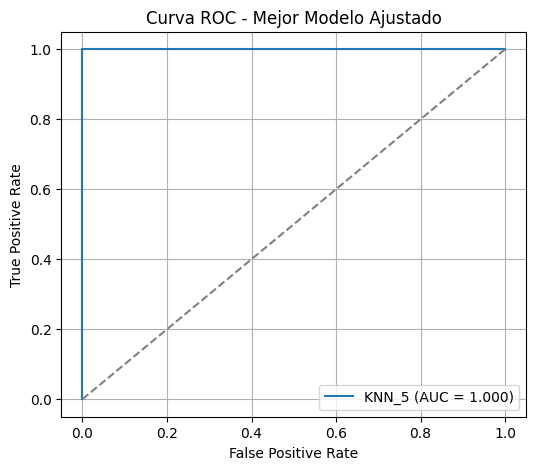

In [20]:
# ==============================================================
# PARTE 2: AJUSTE DE HIPERPARÁMETROS (GRIDSEARCHCV)
# ==============================================================
# Se asume que ya tienes:
#   - df_results   → resultados del CV anterior
#   - models       → diccionario con los clasificadores base
#   - X (UMAP 2D)  → variables reducidas
#   - y            → etiquetas
# ==============================================================

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# --------------------------------------------------------------
# 1️⃣ Elegir el mejor modelo según F1 de la Parte 1
# --------------------------------------------------------------
best_model_name = df_results.loc[0, 'Modelo']
print(f"Mejor modelo anterior según F1: {best_model_name}")

# Recuperamos el modelo base
base_model = models[best_model_name]

# --------------------------------------------------------------
# 2️⃣ Definir el espacio de búsqueda de hiperparámetros
#    (según el tipo de modelo)
# --------------------------------------------------------------
if "SVM" in best_model_name:
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': [0.01, 0.1, 1, 10],
        'kernel': ['rbf']
    }

elif "KNN" in best_model_name:
    param_grid = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]  # Manhattan o Euclidiana
    }

elif "RandomForest" in best_model_name:
    param_grid = {
        'n_estimators': [100, 200, 400],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    }

else:
    raise ValueError("Modelo no reconocido para ajuste automático")

# --------------------------------------------------------------
# 3️⃣ Configurar y ejecutar GridSearchCV
# --------------------------------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring='f1',
    n_jobs=-1,
    cv=cv,
    verbose=2
)

grid.fit(X, y)

print(f"\nMejores parámetros encontrados:\n{grid.best_params_}")
print(f"Mejor puntuación media de F1: {grid.best_score_:.4f}")

# --------------------------------------------------------------
# 4️⃣ Evaluar el modelo optimizado con curva ROC
# --------------------------------------------------------------
best_model_tuned = grid.best_estimator_

# Predicciones y probabilidades
y_pred = best_model_tuned.predict(X)

try:
    y_score = best_model_tuned.predict_proba(X)[:, 1]
except AttributeError:
    # Algunos modelos (como SVM sin probability=True) usan decision_function
    y_score = best_model_tuned.decision_function(X)

roc_auc = roc_auc_score(y, y_score)
print(f"\nROC AUC del mejor modelo ajustado: {roc_auc:.3f}")

# Curva ROC
fpr, tpr, _ = roc_curve(y, y_score)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"{best_model_name} (AUC = {roc_auc:.3f})")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Mejor Modelo Ajustado')
plt.legend()
plt.grid(True)
plt.show()



Evaluando en espacio: Original

Evaluando en espacio: PCA_2D

Evaluando en espacio: UMAP_2D

=== Comparación de rendimiento entre espacios ===


,Espacio,Accuracy,Precision,Recall,F1,ROC_AUC
0,UMAP_2D,0.822,0.783,0.746,0.762,0.867
1,Original,0.807,0.755,0.737,0.745,0.853
2,PCA_2D,0.749,0.669,0.687,0.678,0.788


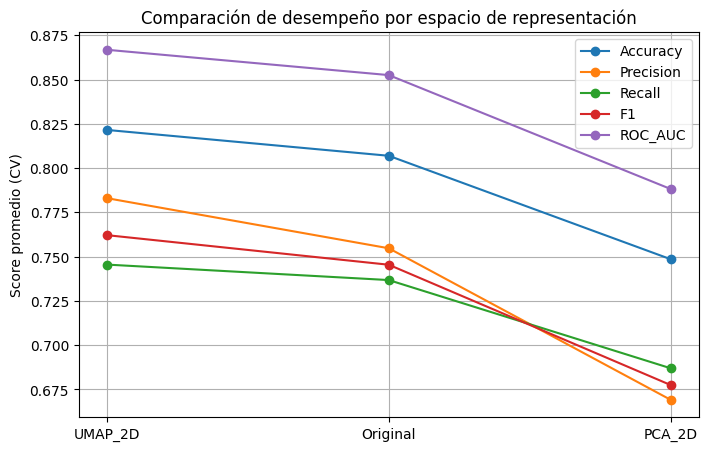

In [21]:
# ==============================================================
# PARTE 3: COMPARACIÓN ENTRE DATOS ORIGINALES, PCA Y UMAP
# ==============================================================
# Basado en el cuaderno 6_CVClasificacion_LFW.ipynb
# ==============================================================
# Requisitos previos:
#   - train : dataset limpio y escalado (sin Survived)
#   - ztrain : proyección PCA (2D)
#   - z : proyección UMAP (2D)
#   - ytrain1 : etiquetas (Survived)
#   - best_model_tuned : mejor modelo optimizado de la Parte 2
# ==============================================================

from sklearn.model_selection import cross_validate

# Escalador
from sklearn.preprocessing import StandardScaler

sca_ = StandardScaler()

# --------------------------------------------------------------
# 1️⃣ Definir los tres espacios de trabajo
# --------------------------------------------------------------
X_original = sca_.fit_transform(train)   # datos sin reducción
X_pca = np.asarray(ztrain)               # proyección PCA 2D
X_umap = np.asarray(z)                   # proyección UMAP 2D
y = np.asarray(ytrain1)

datasets = {
    "Original": X_original,
    "PCA_2D": X_pca,
    "UMAP_2D": X_umap
}

# --------------------------------------------------------------
# 2️⃣ Validación cruzada del mejor modelo en cada espacio
# --------------------------------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

results_compare = []

for name, X_data in datasets.items():
    print(f"\nEvaluando en espacio: {name}")
    
    res = cross_validate(best_model_tuned, X_data, y, cv=cv, scoring=scoring, n_jobs=-1)
    
    results_compare.append({
        'Espacio': name,
        'Accuracy': res['test_accuracy'].mean(),
        'Precision': res['test_precision'].mean(),
        'Recall': res['test_recall'].mean(),
        'F1': res['test_f1'].mean(),
        'ROC_AUC': res['test_roc_auc'].mean()
    })

df_compare = pd.DataFrame(results_compare)
df_compare = df_compare.sort_values(by='F1', ascending=False).reset_index(drop=True)

# --------------------------------------------------------------
# 3️⃣ Mostrar resultados comparativos (versión corregida)
# --------------------------------------------------------------

# Asegurar que todas las métricas sean numéricas
for col in ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC']:
    df_compare[col] = pd.to_numeric(df_compare[col], errors='coerce')

print("\n=== Comparación de rendimiento entre espacios ===")
display(
    df_compare
    .style
    .format({
        'Accuracy': "{:.3f}",
        'Precision': "{:.3f}",
        'Recall': "{:.3f}",
        'F1': "{:.3f}",
        'ROC_AUC': "{:.3f}"
    })
    .background_gradient(subset=['F1'], cmap="YlGnBu")
)


# --------------------------------------------------------------
# 4️⃣ Visualización gráfica comparativa
# --------------------------------------------------------------
plt.figure(figsize=(8,5))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC']:
    plt.plot(df_compare['Espacio'], df_compare[metric], marker='o', label=metric)

plt.title('Comparación de desempeño por espacio de representación')
plt.ylabel('Score promedio (CV)')
plt.legend()
plt.grid(True)
plt.show()


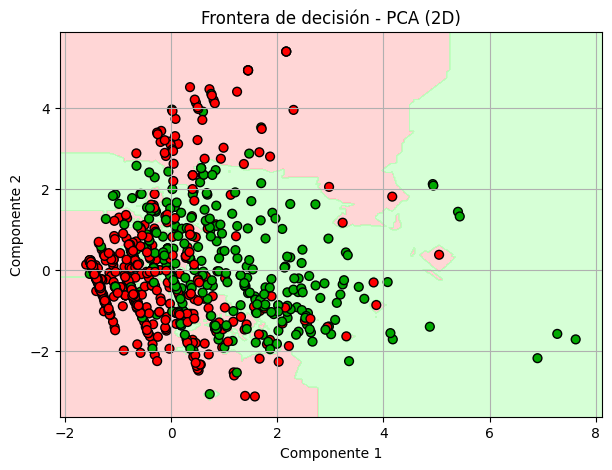

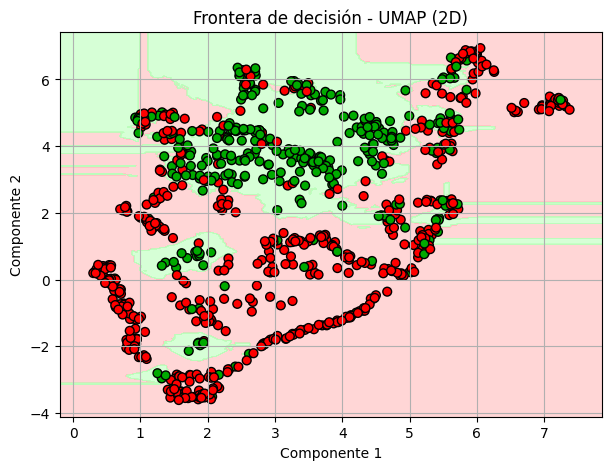

In [22]:
# ==============================================================
# PARTE 4: VISUALIZACIÓN DE FRONTERAS DE DECISIÓN
# ==============================================================
# Basado en el cuaderno 6_CVClasificacion_LFW.ipynb
# ==============================================================
# Requisitos:
#   - best_model_tuned : mejor modelo clasificador (entrenado)
#   - ztrain : proyección PCA (2D)
#   - z : proyección UMAP (2D)
#   - ytrain1 : etiquetas (Survived)
# ==============================================================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# --------------------------------------------------------------
# Función auxiliar: dibuja las fronteras de decisión
# --------------------------------------------------------------
def plot_decision_boundary(model, X, y, title, h=0.02, alpha=0.6):
    """
    Dibuja la frontera de decisión para un modelo en un espacio 2D.
    Parámetros:
      - model: clasificador entrenado (ej: RandomForest)
      - X: datos 2D (array n x 2)
      - y: etiquetas (array n)
      - title: título de la figura
      - h: resolución de la malla
      - alpha: transparencia del fondo
    """
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predicción en cada punto del grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Paleta de colores
    cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB'])
    cmap_bold = ['#FF0000', '#00AA00']
    
    # Fondo con la frontera
    plt.figure(figsize=(7, 5))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=alpha)
    
    # Puntos de entrenamiento
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k', s=40)
    
    plt.title(title)
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.grid(True)
    plt.show()

# --------------------------------------------------------------
# Entrenamos el modelo en los espacios 2D
# --------------------------------------------------------------

# 🔹 PCA
best_model_tuned.fit(ztrain, ytrain1)
plot_decision_boundary(best_model_tuned, ztrain, ytrain1, "Frontera de decisión - PCA (2D)")

# 🔹 UMAP
best_model_tuned.fit(z, ytrain1)
plot_decision_boundary(best_model_tuned, z, ytrain1, "Frontera de decisión - UMAP (2D)")


In [23]:
# ==============================================================
# PARTE 5: GUARDADO DE RESULTADOS
# ==============================================================
# Basado en 6_CVClasificacion_LFW.ipynb
# ==============================================================

# Aseguramos que los DataFrames existen
try:
    df_results
except NameError:
    df_results = pd.DataFrame()  # si no existe por alguna razón

try:
    df_compare
except NameError:
    df_compare = pd.DataFrame()

# --------------------------------------------------------------
# 1️⃣ Crear carpeta de salida (opcional)
# --------------------------------------------------------------
output_path = "/kaggle/working/resultados_titanic"
os.makedirs(output_path, exist_ok=True)

# --------------------------------------------------------------
# 2️⃣ Guardar resultados de validación cruzada general
# --------------------------------------------------------------
if not df_results.empty:
    df_results.to_csv(f"{output_path}/cv_resultados_modelos.csv", index=False)
    print(f"✅ Resultados de modelos guardados en: {output_path}/cv_resultados_modelos.csv")
else:
    print("⚠️ No se encontró df_results, se omite guardado de validación cruzada general.")

# --------------------------------------------------------------
# 3️⃣ Guardar comparativa entre espacios (Original, PCA, UMAP)
# --------------------------------------------------------------
if not df_compare.empty:
    df_compare.to_csv(f"{output_path}/comparacion_espacios.csv", index=False)
    print(f"✅ Comparación entre espacios guardada en: {output_path}/comparacion_espacios.csv")
else:
    print("⚠️ No se encontró df_compare, se omite guardado comparativo.")

# --------------------------------------------------------------
# 4️⃣ Guardar el modelo optimizado (opcional)
# --------------------------------------------------------------
import joblib

try:
    joblib.dump(best_model_tuned, f"{output_path}/best_model_tuned.pkl")
    print(f"✅ Modelo optimizado guardado en: {output_path}/best_model_tuned.pkl")
except Exception as e:
    print(f"⚠️ No se pudo guardar el modelo: {e}")


✅ Resultados de modelos guardados en: /kaggle/working/resultados_titanic/cv_resultados_modelos.csv
✅ Comparación entre espacios guardada en: /kaggle/working/resultados_titanic/comparacion_espacios.csv
✅ Modelo optimizado guardado en: /kaggle/working/resultados_titanic/best_model_tuned.pkl
